# **Global COVID-19 cases**

## **COVID-19 Case Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('/kaggle/input/novel-corona-virus-2019-dataset/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [2]:
df.shape

(306429, 8)

In [6]:
# # !pip install llama-index
# !pip install llama-index-llms-anthropic

In [7]:
import logging
import sys
from IPython.display import Markdown, display

import pandas as pd
from llama_index.core.query_engine import PandasQueryEngine


logging.basicConfig(stream=sys.stdout, level=logging.INFO)
logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

In [8]:
ANTHROPIC_API_KEY="API KEY"

In [9]:
from llama_index.llms.anthropic import Anthropic

In [10]:
llm = Anthropic(temperature=0.0, model='claude-3-opus-20240229',api_key=ANTHROPIC_API_KEY)

In [11]:
query_engine = PandasQueryEngine(df=df,llm=llm,verbose=True)

# Total countries in the dataset

In [12]:
response = query_engine.query(
    "how many Country/Region in the dataset?",
)

HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
len(df['Country/Region'].unique())
```
> Pandas Output: 229


# **Top 10 Countries with the Highest COVID-19 Cases**

In [15]:
response = query_engine.query(
    "give Top 10 Countries with Highest Confirmed Cases",
)

HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('Country/Region')['Confirmed'].sum().nlargest(10)
```
> Pandas Output: Country/Region
US         6.049146e+09
India      3.226768e+09
Brazil     2.653588e+09
Russia     9.305488e+08
France     8.551890e+08
UK         7.837944e+08
Spain      6.491118e+08
Italy      6.366943e+08
Turkey     6.189410e+08
Germany    5.241668e+08
Name: Confirmed, dtype: float64


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('Country/Region')['Confirmed'].sum().nlargest(10).plot(kind='bar', figsize=(10,5), title='Top 10 Countries with Highest Confirmed Cases')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


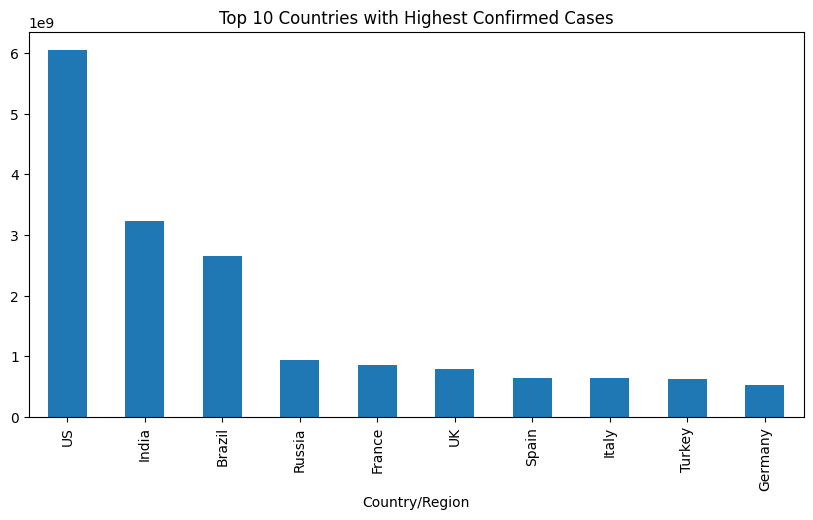

In [40]:
response = query_engine.query(
    "give Top 10 Countries with Highest Confirmed Cases, and also plot the result in bar graph",
)

# **Total confirmed cases, deaths, and recoveries of the 2019 coronavirus**

In [21]:
response = query_engine.query(
    "give total cases by countries",
)

HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df.groupby('Country/Region').sum()['Confirmed']
```
> Pandas Output: Country/Region
 Azerbaijan                              1.0
('St. Martin',)                          2.0
Afghanistan                       17026442.0
Albania                           19768869.0
Algeria                           27684358.0
                                     ...    
West Bank and Gaza                41819444.0
Yemen                               962066.0
Zambia                            13493953.0
Zimbabwe                           6484581.0
occupied Palestinian territory          25.0
Name: Confirmed, Length: 229, dtype: float64


# **Correlation between confirmed cases and deaths**

In [22]:
response = query_engine.query(
    "Correlation between confirmed cases and deaths",
)

HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df['Confirmed'].corr(df['Deaths'])
```
> Pandas Output: 0.8884159872096509


# **Standard deviation of confirmed cases, deaths, and recoveries**

In [35]:
response = query_engine.query(
    "Standard deviation of confirmed cases, deaths, and recoveries",
)

HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df[['Confirmed', 'Deaths', 'Recovered']].std()
```
> Pandas Output: Confirmed    277551.604043
Deaths         6410.938048
Recovered    201512.447838
dtype: float64


# **Median of Confirmed Cases, Deaths, and Recoveries**

In [38]:
response = query_engine.query(
    "Median of Confirmed Cases, Deaths, and Recoveries",
)

HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df[['Confirmed', 'Deaths', 'Recovered']].median()
```
> Pandas Output: Confirmed    10375.0
Deaths         192.0
Recovered     1751.0
dtype: float64


HTTP Request: POST https://api.anthropic.com/v1/messages "HTTP/1.1 200 OK"
> Pandas Instructions:
```
df[['Confirmed', 'Deaths', 'Recovered']].median().plot(kind='bar')
```
> Pandas Output: Axes(0.125,0.11;0.775x0.77)


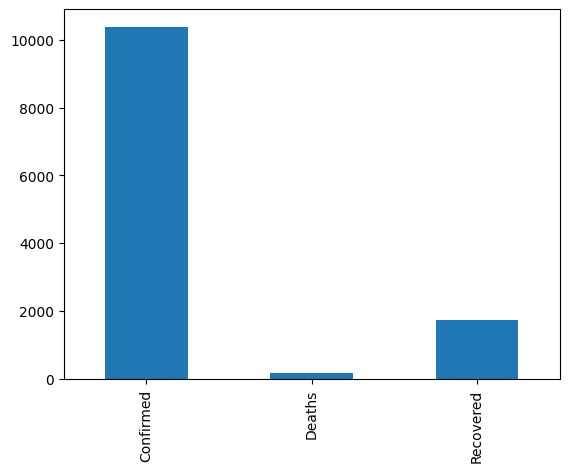

In [39]:
response = query_engine.query(
    "Median of Confirmed Cases, Deaths, and Recoveries,also plot the result in bar graph",
)